# Data Analysis

#### Import Dependencies

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

#### Read annotation files

In [12]:
base_path = '../data/In-shop Clothes Retrieval Benchmark'
attr_cloth_file = os.path.join(base_path, 'Anno/attributes/list_attr_cloth.txt')
attr_items_file = os.path.join(base_path, 'Anno/attributes/list_attr_items.txt')
splits_file = os.path.join(base_path, 'Eval/list_eval_partition.txt')

In [3]:
attrs = pd.read_csv(attr_cloth_file, header=1)
attrs = attrs['attribute_name'].values.tolist()
len(attrs)

463

In [4]:
labels = pd.read_csv(attr_items_file, sep=' ', names=attrs, skiprows=2)
labels.index.name = 'item_id'
labels['sum_T'] = labels[labels==1].sum(axis=1)
labels['sum_F'] = labels[labels==-1].sum(axis=1) * -1

labels[labels.index.duplicated()]

,lightweight,polyester,woven,knit,cotton,unlined,rayon,spandex,top,print,...,invisible back zipper,concealed side zipper,front slant pocket,front patch pocket,adjustable cami strap,adjustable spaghetti strap,back patch pocket,invisible side zipper,sum_T,sum_F
item_id,,,,,,,,,,,,,,,,,,,,,
id_00000065,-1,-1,1,-1,-1,1,1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,32.0,431.0
id_00000094,1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,22.0,441.0
id_00000113,1,-1,-1,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,15.0,448.0
id_00000119,-1,-1,-1,1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,20.0,443.0
id_00000181,-1,1,1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,11.0,452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_00006154,-1,-1,-1,1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,24.0,439.0
id_00006747,1,-1,1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,25.0,438.0
id_00006912,1,1,1,-1,-1,-1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,21.0,442.0


In [5]:
print(f'Before dropping duplicates: {len(labels)}')
labels = labels[~labels.index.duplicated(keep='first')]
print(f'After dropping duplicates: {len(labels)}')

Before dropping duplicates: 8081
After dropping duplicates: 7982


In [6]:
splits = pd.read_csv(splits_file, sep='\s+', header=1)
splits['sex'] = splits.apply(lambda row: row['image_name'].split('/')[1], axis=1)
splits['category'] = splits.apply(lambda row: row['image_name'].split('/')[2], axis=1)
splits

,image_name,item_id,evaluation_status,sex,category
0,img/WOMEN/Dresses/id_00000002/02_1_front.jpg,id_00000002,train,WOMEN,Dresses
1,img/WOMEN/Dresses/id_00000002/02_2_side.jpg,id_00000002,train,WOMEN,Dresses
2,img/WOMEN/Dresses/id_00000002/02_4_full.jpg,id_00000002,train,WOMEN,Dresses
3,img/WOMEN/Dresses/id_00000002/02_7_additional.jpg,id_00000002,train,WOMEN,Dresses
4,img/WOMEN/Skirts/id_00000003/02_1_front.jpg,id_00000003,train,WOMEN,Skirts
...,...,...,...,...,...
52707,img/WOMEN/Jackets_Coats/id_00007982/12_7_addit...,id_00007982,gallery,WOMEN,Jackets_Coats
52708,img/WOMEN/Jackets_Coats/id_00007982/13_1_front...,id_00007982,query,WOMEN,Jackets_Coats
52709,img/WOMEN/Jackets_Coats/id_00007982/13_2_side.jpg,id_00007982,gallery,WOMEN,Jackets_Coats
52710,img/WOMEN/Jackets_Coats/id_00007982/13_3_back.jpg,id_00007982,query,WOMEN,Jackets_Coats


#### Data splits

Number of images per dataset split.

In [7]:
splits.groupby('evaluation_status').size()

evaluation_status
gallery    12612
query      14218
train      25882
dtype: int64

In [8]:
splits.groupby('sex').size()

sex
MEN       7838
WOMEN    44874
dtype: int64

In [9]:
splits.groupby(['evaluation_status', 'sex']).size()

evaluation_status  sex  
gallery            MEN       2000
                   WOMEN    10612
query              MEN       2243
                   WOMEN    11975
train              MEN       3595
                   WOMEN    22287
dtype: int64

In [10]:
splits.groupby(['evaluation_status', 'sex', 'category']).size()

evaluation_status  sex    category           
gallery            MEN    Denim                    96
                          Jackets_Vests            81
                          Pants                   284
                          Shirts_Polos            206
                          Shorts                  229
                                                 ... 
train              WOMEN  Shorts                 1631
                          Skirts                  886
                          Sweaters               1642
                          Sweatshirts_Hoodies     414
                          Tees_Tanks             5983
Length: 69, dtype: int64

In [11]:
print(labels.isnull().values.any())
print(pd.isna(labels).values.any())
labels

False
False


,lightweight,polyester,woven,knit,cotton,unlined,rayon,spandex,top,print,...,invisible back zipper,concealed side zipper,front slant pocket,front patch pocket,adjustable cami strap,adjustable spaghetti strap,back patch pocket,invisible side zipper,sum_T,sum_F
item_id,,,,,,,,,,,,,,,,,,,,,
id_00000001,1,1,1,-1,-1,1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,15.0,448.0
id_00000002,1,-1,1,-1,-1,1,1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,25.0,438.0
id_00000003,1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,25.0,438.0
id_00000004,1,-1,1,-1,-1,1,1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,25.0,438.0
id_00000005,1,1,1,-1,1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,28.0,435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_00007978,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,25.0,438.0
id_00007979,1,-1,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,17.0,446.0
id_00007980,1,1,-1,1,-1,-1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,22.0,441.0


In [12]:
print(labels[['sum_T','sum_F']].describe())

             sum_T        sum_F
count  7982.000000  7982.000000
mean     19.772112   443.227888
std       5.493152     5.493152
min       0.000000   422.000000
25%      16.000000   440.000000
50%      19.000000   444.000000
75%      23.000000   447.000000
max      41.000000   463.000000


These items have no attributes set to true.

In [13]:
labels[labels['sum_T'] == 0].merge(splits[['item_id', 'evaluation_status']].drop_duplicates(), how='left', on='item_id')

,item_id,lightweight,polyester,woven,knit,cotton,unlined,rayon,spandex,top,...,concealed side zipper,front slant pocket,front patch pocket,adjustable cami strap,adjustable spaghetti strap,back patch pocket,invisible side zipper,sum_T,sum_F,evaluation_status
0,id_00001572,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,0.0,463.0,gallery
1,id_00001572,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,0.0,463.0,query
2,id_00005085,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,0.0,463.0,train


In [14]:
true_counts_by_attr = labels[labels==1].drop(labels=['sum_T', 'sum_F'], axis=1).count().to_dict()#.values.tolist()
print(true_counts_by_attr)

{'lightweight': 5004, 'polyester': 3803, 'woven': 3879, 'knit': 3946, 'cotton': 3364, 'unlined': 2940, 'rayon': 2595, 'spandex': 1980, 'top': 2085, 'print': 1905, 'pockets': 1346, 'dress': 1757, 'classic': 1440, 'lined': 4353, 'fit': 1909, 'round': 1475, 'love': 1682, 'elasticized': 1106, 'tee': 1281, 'trim': 1194, 'lining': 969, 'sleeveless': 989, 'buttoned': 899, 'zipper': 1132, 'ribbed': 821, 'sleek': 798, 'floral': 869, 'denim': 636, 'shorts': 677, 'graphic': 693, 'black': 26, 'forever': 685, 'nylon': 665, 'pocket': 2165, 'long-sleeved': 639, 'cami': 640, 'straps': 623, 'fabrication': 632, 'drawstring': 607, 'bust': 605, 'black-cream': 0, 'shoulder': 669, 'skirt': 676, 'fly': 605, 'pattern': 682, 'jeans': 530, 'contrast': 565, 'little': 520, 'point': 440, 'basic': 706, 'makes': 538, 'chic': 660, 'neck': 3078, 'patch': 525, 'cool': 609, 'zip': 1645, 'acrylic': 499, 'comfort': 825, 'cream': 12, 'lace': 759, 'casual': 514, 'relaxed': 469, 'fabric': 1100, 'shirt': 729, 'black-white': 0

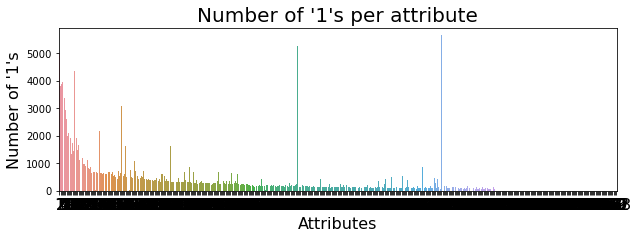

In [15]:
plt.figure(figsize=(10, 3))
ax = sns.barplot(y=list(true_counts_by_attr.values()), x=list(true_counts_by_attr.keys()))
plt.title("Number of '1's per attribute", fontsize=20)
plt.xlabel("Attributes", fontsize=16)
ax.set_xticklabels(range(1, len(true_counts_by_attr)+1), rotation=0, fontsize=16)
plt.ylabel("Number of '1's", fontsize=16)
plt.show()

The following attributes are never true for all images the entire dataset across all splits.

In [16]:
always_false_attrs = [attr for attr, count in true_counts_by_attr.items() if count == 0]
print(f'The following {len(always_false_attrs)} attributes are always false:')
print(always_false_attrs)

The following 116 attributes are always false:
['black-cream', 'black-white', 'heather grey', 'burgundy', 'olive', 'navy', 'cream-navy', 'blush', 'blue-cream', 'navy-white', 'taupe', 'denim washed', 'black-heather grey', 'black-red', 'blue-white', 'round neckline', 'long sleeve', 'fully lined', 'short sleeve', 'elasticized waist', 'front pocket', 'back zipper', 'partially lined', 'zip fly', 'patch pocket', 'ribbed trim', 'drawstring waist', 'crop top', 'crew neck', 'basic collar', '3/4 sleeve', 'keyhole back', 'open front', 'faux leather', 'buttoned keyhole', 'side zipper', 'buttoned front', 'chest patch', 'elasticized drawstring', 'exposed back', 'chest pocket', 'muscle tee', 'relaxed fit', 'skinny jean', 'floral lace', 'maxi dress', 'scoop neckline', 'adjustable strap', 'french terry', 'welt pocket', 'slant pocket', 'woven fabric', 'pencil skirt', 'spaghetti strap', 'slub knit', 'ribbed knit', 'sleeveless top', 'cami strap', 'knit fabrication', 'short-sleeved tee', 'crew neckline', '

In [19]:
min_count = 80

to_include_attrs = {attr:count for attr, count in true_counts_by_attr.items() if count >= 800}
print(f'The following {len(to_include_attrs)} attributes are included:')
print(to_include_attrs)

to_exclude_attrs = [attr for attr, count in true_counts_by_attr.items() if count < 800]
print(f'The following {len(to_exclude_attrs)} attributes are excluded:')
print(to_exclude_attrs)

The following 36 attributes are included:
{'lightweight': 5004, 'polyester': 3803, 'woven': 3879, 'knit': 3946, 'cotton': 3364, 'unlined': 2940, 'rayon': 2595, 'spandex': 1980, 'top': 2085, 'print': 1905, 'pockets': 1346, 'dress': 1757, 'classic': 1440, 'lined': 4353, 'fit': 1909, 'round': 1475, 'love': 1682, 'elasticized': 1106, 'tee': 1281, 'trim': 1194, 'lining': 969, 'sleeveless': 989, 'buttoned': 899, 'zipper': 1132, 'ribbed': 821, 'floral': 869, 'pocket': 2165, 'neck': 3078, 'zip': 1645, 'comfort': 825, 'fabric': 1100, 'button': 1621, 'every': 856, 'light': 5269, 'stripe': 867, 'line': 5651}
The following 427 attributes are excluded:
['sleek', 'denim', 'shorts', 'graphic', 'black', 'forever', 'nylon', 'long-sleeved', 'cami', 'straps', 'fabrication', 'drawstring', 'bust', 'black-cream', 'shoulder', 'skirt', 'fly', 'pattern', 'jeans', 'contrast', 'little', 'point', 'basic', 'makes', 'chic', 'patch', 'cool', 'acrylic', 'cream', 'lace', 'casual', 'relaxed', 'shirt', 'black-white', 'c

#### Baselines

In [20]:
def accuracy(df1, df2):
    """
    Computes accuracy between two DataFrames
    """
    return (df1 == df2).astype(int).sum().sum() / df1.count().sum()

gt = labels.drop(labels=['sum_T', 'sum_F'], axis=1)

# Predict all False (-1)
default_predictions = {attr:-1 for attr, _ in true_counts_by_attr.items() }
print(f'Predict 1 for {len([1 for attr, pred in default_predictions.items() if pred == 1])} attributes')
prediction_df = gt.copy()
for attr, pred in default_predictions.items():
    prediction_df[attr] = prediction_df[attr].apply(lambda x: pred)
acc = accuracy(gt, prediction_df)
print(f'Accuracy={acc}')

# Predict based on majority per attribute
default_predictions = {attr:1 if count >= len(gt) / 2 else -1 for attr, count in true_counts_by_attr.items() }
print(f'Predict 1 for {len([1 for attr, pred in default_predictions.items() if pred == 1])} attributes')
prediction_df = gt.copy()
for attr, pred in default_predictions.items():
    prediction_df[attr] = prediction_df[attr].apply(lambda x: pred)
acc = accuracy(gt, prediction_df)
print(f'Accuracy={acc}')

# gt = gt.drop(labels=always_false_attrs, axis=1)
# gt.columns
# # Predict all False (-1) after removing always-False 
# default_predictions = {attr:-1 for attr  in gt.columns }
# print(f'Predict 1 for {len([1 for attr, pred in default_predictions.items() if pred == 1])} attributes')
# prediction_df = gt.copy()
# for attr, pred in default_predictions.items():
#     prediction_df[attr] = prediction_df[attr].apply(lambda x: pred)
# acc = accuracy(gt, prediction_df)
# print(f'Accuracy={acc}')

gt = gt.drop(labels=to_exclude_attrs, axis=1)
gt.columns
# Predict all False (-1) after removing always-False 
default_predictions = {attr:-1 for attr  in gt.columns }
print(default_predictions)
print(f'Predict 1 for {len([1 for attr, pred in default_predictions.items() if pred == 1])} attributes')
prediction_df = gt.copy()
for attr, pred in default_predictions.items():
    prediction_df[attr] = prediction_df[attr].apply(lambda x: pred)
acc = accuracy(gt, prediction_df)
print(f'Accuracy={acc}')

# # Predict based on majority per attribute
# default_predictions = {attr:1 if count >= len(gt) / 2 else -1 for attr, count in true_counts_by_attr.items() }
# print(f'Predict 1 for {len([1 for attr, pred in default_predictions.items() if pred == 1])} attributes')
# prediction_df = gt.copy()
# for attr, pred in default_predictions.items():
#     prediction_df[attr] = prediction_df[attr].apply(lambda x: pred)
# acc = accuracy(gt, prediction_df)
# print(f'Accuracy={acc}')

Predict 1 for 0 attributes
Accuracy=0.957295653882142
Predict 1 for 4 attributes
Accuracy=0.9596297392675637
{'lightweight': -1, 'polyester': -1, 'woven': -1, 'knit': -1, 'cotton': -1, 'unlined': -1, 'rayon': -1, 'spandex': -1, 'top': -1, 'print': -1, 'pockets': -1, 'dress': -1, 'classic': -1, 'lined': -1, 'fit': -1, 'round': -1, 'love': -1, 'elasticized': -1, 'tee': -1, 'trim': -1, 'lining': -1, 'sleeveless': -1, 'buttoned': -1, 'zipper': -1, 'ribbed': -1, 'floral': -1, 'pocket': -1, 'neck': -1, 'zip': -1, 'comfort': -1, 'fabric': -1, 'button': -1, 'every': -1, 'light': -1, 'stripe': -1, 'line': -1}
Predict 1 for 0 attributes
Accuracy=0.7292519279489964


In [42]:
num_images_per_id = splits[['item_id', 'image_name']].groupby('item_id').count()
num_images_per_id.describe()

,image_name
count,7982.000000
mean,6.603859
std,6.621219
min,1.000000
25%,4.000000
50%,5.000000
75%,8.000000
max,162.000000


This is the item with the most number of images.

In [43]:
num_images_per_id[num_images_per_id['image_name'] == num_images_per_id.max().values[0]]

,image_name
item_id,
id_00003523,162


In [44]:
splits[splits['item_id'] == 'id_00003523']

,image_name,item_id,evaluation_status,sex,category
11194,img/WOMEN/Tees_Tanks/id_00003523/01_1_front.jpg,id_00003523,train,WOMEN,Tees_Tanks
11195,img/WOMEN/Tees_Tanks/id_00003523/01_2_side.jpg,id_00003523,train,WOMEN,Tees_Tanks
11196,img/WOMEN/Tees_Tanks/id_00003523/01_3_back.jpg,id_00003523,train,WOMEN,Tees_Tanks
11197,img/WOMEN/Tees_Tanks/id_00003523/01_4_full.jpg,id_00003523,train,WOMEN,Tees_Tanks
11198,img/WOMEN/Tees_Tanks/id_00003523/01_7_addition...,id_00003523,train,WOMEN,Tees_Tanks
...,...,...,...,...,...
11351,img/WOMEN/Tees_Tanks/id_00003523/65_2_side.jpg,id_00003523,train,WOMEN,Tees_Tanks
11352,img/WOMEN/Tees_Tanks/id_00003523/65_7_addition...,id_00003523,train,WOMEN,Tees_Tanks
11353,img/WOMEN/Tees_Tanks/id_00003523/66_1_front.jpg,id_00003523,train,WOMEN,Tees_Tanks
11354,img/WOMEN/Tees_Tanks/id_00003523/66_3_back.jpg,id_00003523,train,WOMEN,Tees_Tanks


In [45]:
train_split_images = splits[splits['evaluation_status']=='train'][['item_id', 'evaluation_status']]
train_split_images = train_split_images.merge(gt, how='left', on='item_id')
train_split_items = train_split_images.groupby('item_id')
print(f'Number of images in train split: {len(train_split_images)}')
print(f'Number of items in train split: {len(train_split_items)}')

Number of images in train split: 25882
Number of items in train split: 3997


In [46]:
train_split_items.size()

item_id
id_00000002     4
id_00000003     5
id_00000004     6
id_00000005     4
id_00000006    10
               ..
id_00007973     4
id_00007975     4
id_00007976     5
id_00007979    10
id_00007981     3
Length: 3997, dtype: int64

In [47]:
train_dataset_attr = train_split_images \
    .drop_duplicates(subset=['item_id']) \
    .drop(labels=['evaluation_status'], axis=1) \
    .replace(-1, 0)
print(train_dataset_attr.shape)
print(train_dataset_attr.isnull().values.any())
train_dataset_attr_np = train_dataset_attr.to_numpy()
dim = train_dataset_attr_np.shape[1]-1

(3997, 14)
False


In [48]:
train_dataset_attr_np

array([['id_00000002', 1, 0, ..., 1, 1, 1],
       ['id_00000003', 1, 1, ..., 0, 1, 1],
       ['id_00000004', 1, 0, ..., 1, 1, 1],
       ...,
       ['id_00007976', 1, 1, ..., 1, 1, 1],
       ['id_00007979', 1, 0, ..., 1, 1, 1],
       ['id_00007981', 0, 1, ..., 0, 0, 0]], dtype=object)

In [49]:
np.save(f'train_dataset_attr_{dim}.npy', train_dataset_attr_np)

In [50]:
np.load(f'train_dataset_attr_{dim}.npy', allow_pickle=True)

array([['id_00000002', 1, 0, ..., 1, 1, 1],
       ['id_00000003', 1, 1, ..., 0, 1, 1],
       ['id_00000004', 1, 0, ..., 1, 1, 1],
       ...,
       ['id_00007976', 1, 1, ..., 1, 1, 1],
       ['id_00007979', 1, 0, ..., 1, 1, 1],
       ['id_00007981', 0, 1, ..., 0, 0, 0]], dtype=object)

In [51]:
train_images_dataset = splits[splits['evaluation_status']=='train'][['item_id', 'image_name']]
print(train_images_dataset.isnull().values.any())
train_images_dataset = train_images_dataset.to_numpy()

False


In [52]:
train_images_dataset

array([['id_00000002', 'img/WOMEN/Dresses/id_00000002/02_1_front.jpg'],
       ['id_00000002', 'img/WOMEN/Dresses/id_00000002/02_2_side.jpg'],
       ['id_00000002', 'img/WOMEN/Dresses/id_00000002/02_4_full.jpg'],
       ...,
       ['id_00007981', 'img/WOMEN/Tees_Tanks/id_00007981/03_1_front.jpg'],
       ['id_00007981', 'img/WOMEN/Tees_Tanks/id_00007981/03_3_back.jpg'],
       ['id_00007981',
        'img/WOMEN/Tees_Tanks/id_00007981/03_7_additional.jpg']],
      dtype=object)

In [53]:
np.save('train_dataset_images.npy', train_images_dataset)

In [61]:
attr_counts = train_dataset_attr[train_dataset_attr==1].count()
attr_counts

item_id           0
lightweight    2484
polyester      1899
woven          1928
knit           1987
cotton         1689
unlined        1480
rayon          1300
top            1020
lined          2156
pocket         1065
neck           1562
light          2609
line           2849
dtype: int64

In [62]:
attr_counts = attr_counts.to_list()[1:]
dim = np.array(attr_counts).shape[0]
dim

13

In [55]:
np.save(f'train_dataset_attr_{dim}_counts.npy', np.array(attr_counts))

### Investigate Segmentation Masks

In [14]:
import json
from pprint import pprint

seg_path = os.path.join(base_path, 'Anno/segmentation/DeepFashion_segmentation_gallery.json')

with open(seg_path) as f:
    seg_data = json.load(f)

In [39]:
print(seg_data.keys())
numImages = len(seg_data['images'])
numAnno = len(seg_data['annotations'])
print(f'Number of images: {numImages}')
print(f'Number of annotations: {numAnno}')

dict_keys(['info', 'images', 'annotations', 'categories'])
Number of images: 3810
Number of annotations: 11042


#### Info

In [45]:
seg_data['info']

{'description': 'DeepFashion In-shop Dataset for Detection and Segmentation',
 'url': 'http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html',
 'version': '1.0',
 'data_created': '2020/02/21',
 'year': 2020,
 'contributor': 'mmFashion team'}

#### Images metadata

In [87]:
seg_data['images'][0]

{'file_name': 'img_highres/MEN/Tees_Tanks/id_00006424/04_1_front.jpg',
 'height': 1101,
 'id': '00006424041',
 'width': 750}

#### Annotation

In [47]:
seg_data['annotations'][0].keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

In [72]:
seg_anno_df = pd.DataFrame(seg_data['annotations'])
seg_anno_df

,segmentation,area,iscrowd,image_id,bbox,category_id,id
0,"[[372.0, 1001.5, 371.0, 1001.5, 370.0, 1001.5,...",292116,0,00006424041,"[56.0, 247.0, 573.0, 755.0]",1,1
1,"[[509.0, 1100.5, 508.0, 1100.5, 507.0, 1100.5,...",40099,0,00006424041,"[121.0, 956.0, 389.0, 145.0]",6,2
2,"[[253.0, 821.5, 252.0, 821.5, 251.5, 821.0, 25...",183860,0,00004750012,"[201.0, 114.0, 411.0, 709.0]",1,3
3,"[[493.0, 1100.5, 492.0, 1100.5, 491.0, 1100.5,...",87192,0,00004750012,"[182.0, 804.0, 327.0, 297.0]",6,4
4,"[[364.0, 810.5, 363.0, 810.5, 362.0, 810.5, 36...",2797,0,00004750012,"[324.0, 736.0, 67.0, 75.0]",8,5
...,...,...,...,...,...,...,...
11037,"[[449.0, 1100.5, 448.0, 1100.5, 447.0, 1100.5,...",71725,0,00007271042,"[145.0, 646.0, 305.0, 455.0]",6,11038
11038,"[[230.0, 290.5, 229.0, 290.5, 228.5, 290.0, 22...",601,0,00007271042,"[158.0, 229.0, 113.0, 736.0]",8,11039
11039,"[[298.0, 773.5, 297.0, 773.5, 296.0, 773.5, 29...",126398,0,00007284032,"[197.0, 244.0, 371.0, 530.0]",1,11040
11040,"[[496.0, 1100.5, 495.0, 1100.5, 494.0, 1100.5,...",102304,0,00007284032,"[177.0, 742.0, 369.0, 359.0]",6,11041


In [85]:
pprint(seg_data['annotations'][40])

{'area': 56353,
 'bbox': [172.0, 808.0, 323.0, 293.0],
 'category_id': 6,
 'id': '41',
 'image_id': '00002109021',
 'iscrowd': 0,
 'segmentation': [[458.0,
                   1100.5,
                   457.0,
                   1100.5,
                   456.0,
                   1100.5,
                   455.0,
                   1100.5,
                   454.0,
                   1100.5,
                   453.0,
                   1100.5,
                   452.0,
                   1100.5,
                   451.0,
                   1100.5,
                   450.0,
                   1100.5,
                   449.0,
                   1100.5,
                   448.0,
                   1100.5,
                   447.0,
                   1100.5,
                   446.0,
                   1100.5,
                   445.0,
                   1100.5,
                   444.0,
                   1100.5,
                   443.0,
                   1100.5,
                   442

                   871.0,
                   188.5,
                   872.0,
                   189.0,
                   872.5,
                   189.5,
                   873.0,
                   189.5,
                   874.0,
                   189.5,
                   875.0,
                   189.5,
                   876.0,
                   189.5,
                   877.0,
                   189.5,
                   878.0,
                   190.0,
                   878.5,
                   190.5,
                   879.0,
                   190.5,
                   880.0,
                   190.5,
                   881.0,
                   190.5,
                   882.0,
                   190.5,
                   883.0,
                   190.5,
                   884.0,
                   190.5,
                   885.0,
                   190.5,
                   886.0,
                   190.5,
                   887.0,
                   190.5,
            

                   282.5,
                   918.0,
                   282.5,
                   917.0,
                   282.5,
                   916.0,
                   282.5,
                   915.0,
                   282.0,
                   914.5,
                   281.5,
                   914.0,
                   281.5,
                   913.0,
                   281.5,
                   912.0,
                   281.5,
                   911.0,
                   281.5,
                   910.0,
                   281.5,
                   909.0,
                   281.5,
                   908.0,
                   281.5,
                   907.0,
                   281.5,
                   906.0,
                   281.5,
                   905.0,
                   281.5,
                   904.0,
                   281.0,
                   903.5,
                   280.5,
                   903.0,
                   280.5,
                   902.0,
            

#### Categories

In [41]:
print(len(seg_data['categories']))
pprint(seg_data['categories'])

15
[{'id': 1, 'name': 'top', 'supercategory': 'CLOTHES'},
 {'id': 2, 'name': 'skirt', 'supercategory': 'CLOTHES'},
 {'id': 3, 'name': 'leggings', 'supercategory': 'CLOTHES'},
 {'id': 4, 'name': 'dress', 'supercategory': 'CLOTHES'},
 {'id': 5, 'name': 'outer', 'supercategory': 'CLOTHES'},
 {'id': 6, 'name': 'pants', 'supercategory': 'CLOTHES'},
 {'id': 7, 'name': 'bag', 'supercategory': 'ACCESSORIES'},
 {'id': 8, 'name': 'neckwear', 'supercategory': 'ACCESSORIES'},
 {'id': 9, 'name': 'headwear', 'supercategory': 'ACCESSORIES'},
 {'id': 10, 'name': 'eyeglass', 'supercategory': 'ACCESSORIES'},
 {'id': 11, 'name': 'belt', 'supercategory': 'ACCESSORIES'},
 {'id': 12, 'name': 'footwear', 'supercategory': 'ACCESSORIES'},
 {'id': 13, 'name': 'hair', 'supercategory': 'PERSON'},
 {'id': 14, 'name': 'skin', 'supercategory': 'PERSON'},
 {'id': 15, 'name': 'face', 'supercategory': 'PERSON'}]


In [137]:
from PIL import Image
import numpy as np

seg_im_path = os.path.join(base_path, 'Img', seg_data['images'][10]['file_name']).replace('.jpg', '_segment.png')
print(seg_im_path)

im_frame = Image.open(seg_im_path)
np_frame = np.array(im_frame)[:,:,:3]
print(np_frame.shape)

../data/In-shop Clothes Retrieval Benchmark/Img/img_highres/MEN/Pants/id_00006856/01_1_front_segment.png
(1101, 750, 3)


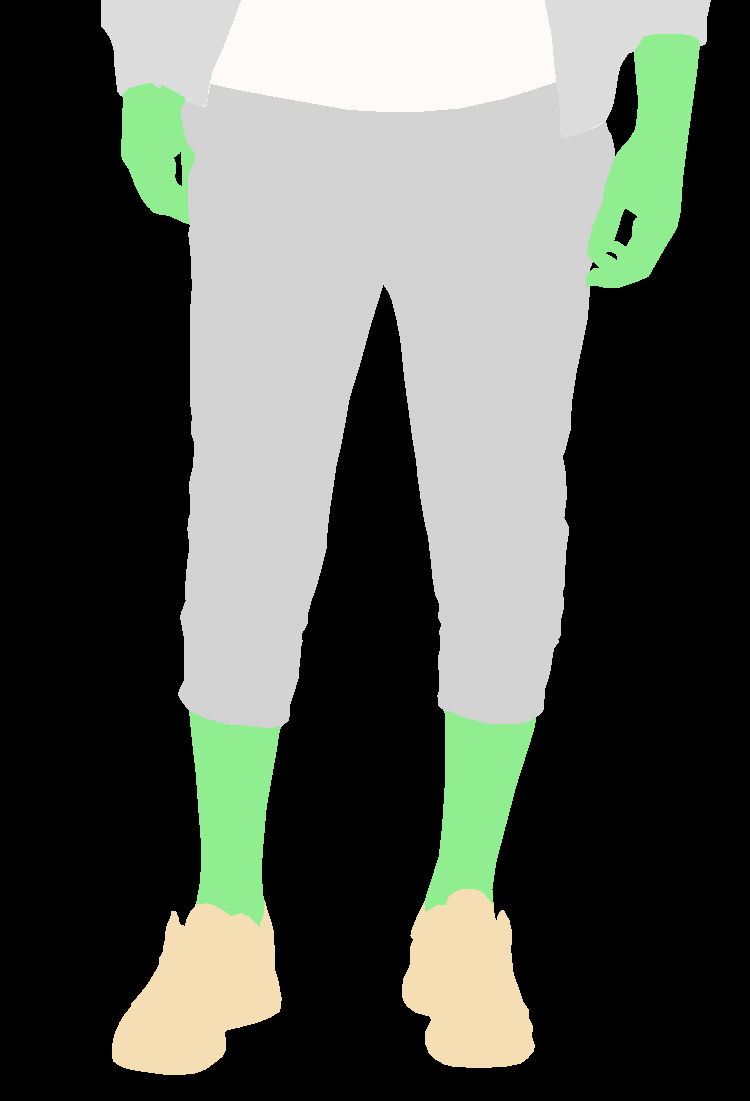

In [139]:
display(im_frame)

In [118]:
# |        0-0-0          |    background   |
# |        255-250-250    |    top          |
# |        250-235-215    |    skirt        |
# |        70-130-180     |    leggings     |
# |        16-78-139      |    dress        |
# |        255-250-205    |    outer        |
# |        255-140-0      |    pants        |
# |        50-205-50      |    bag          |
# |        220-220-220    |    neckwear     |
# |        255-0-0        |    headwear     |
# |        127-255-212    |    eyeglass     |
# |        0-100-0        |    belt         |
# |        255-255-0      |    footwear     |
# |        211-211-211    |    hair         |
# |        144-238-144    |    skin         |
# |        245-222-179    |    face         |

seg_label_map = {
    'background': [0,0,0],
    'top': [255,250,250],
    'skirt': [250,235,215],
    'leggings': [70,130,180],
    'dress': [16,78,139],
    'outer': [255,250,205],
    'pants': [255,140,0],
    'bag': [50,205,50],
    'neckwear': [220,220,220],
    'headwear': [255,0,0],
    'eyeglass': [127,255,212],
    'belt': [0,100,0],
    'footwear': [255,255,0],
    'hair': [211,211,211],
    'skin': [144,238,144],
    'face': [245,222,179],
}

for l, rgb in seg_label_map.items():
    print(l, sum(rgb))

# Set size of 16 indicates that all RGB value sums are unique
len(set(set(sum(rgb) for rgb in seg_label_map.values())))

background 0
top 755
skirt 700
leggings 380
dress 233
outer 710
pants 395
bag 305
neckwear 660
headwear 255
eyeglass 594
belt 100
footwear 510
hair 633
skin 526
face 646


16

In [160]:
# So, we can efficiently determine label per pixel based on RGB sum

seg_im_path = os.path.join(base_path, 'Img', seg_data['images'][0]['file_name']).replace('.jpg', '_segment.png')

genMask = np.vectorize(lambda x, v: 1 if x == v else 0)

def loadSegmentationArray(seg_im_path):
    
    im_frame = Image.open(seg_im_path)
    np_frame = np.array(im_frame)[:,:,:3]

    seg = np.stack([genMask(np_frame.sum(axis=2), sum(rgb)) for rgb in seg_label_map.values()])
    
    return seg

loadSegmentationArray(seg_im_path).shape

(16, 1101, 750)